In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

Загружаем датасет

In [28]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Построим графики зависимости таргета от всех признаков

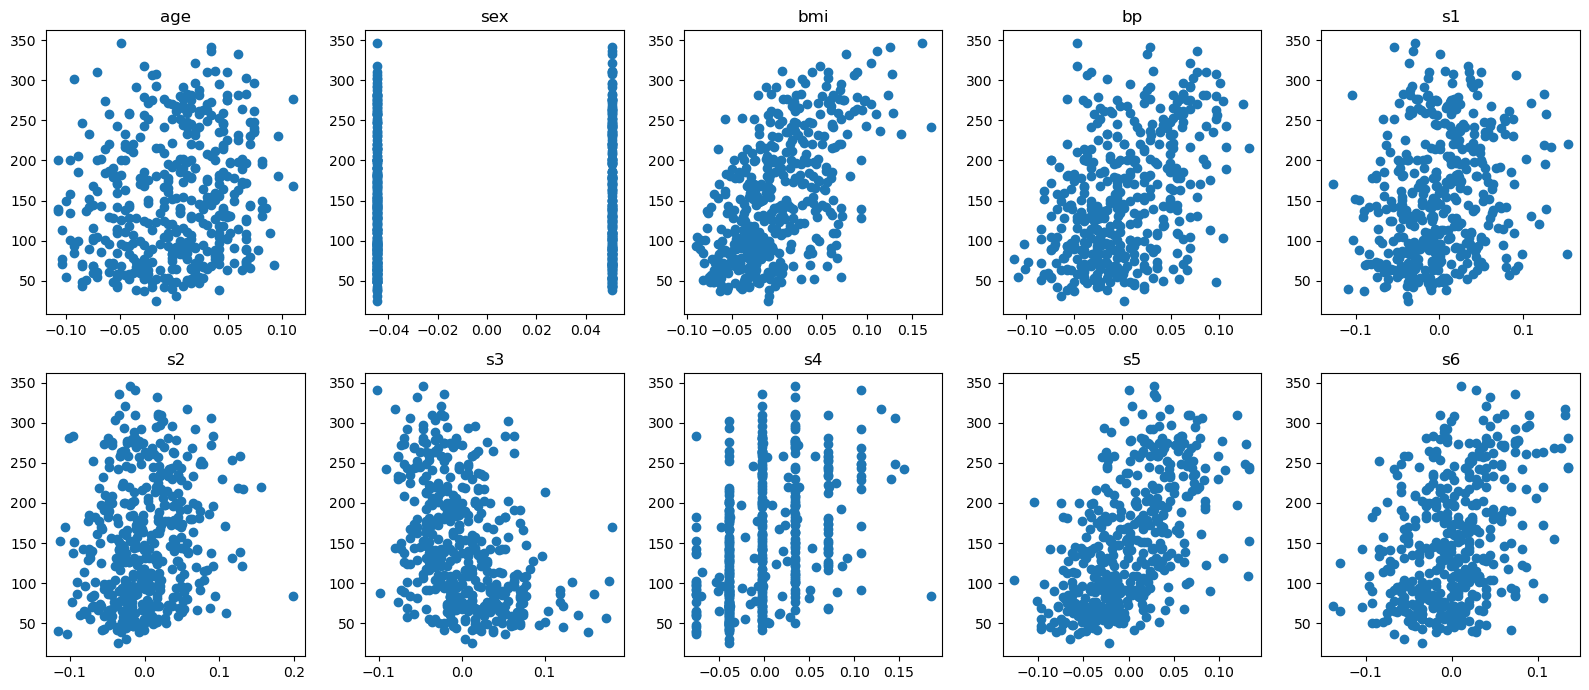

In [29]:
plt.figure(figsize=(16, 7))
features = df.columns.drop('target')

for j, name in enumerate(features, 1):
    plt.subplot(2, 5, j)
    plt.scatter(df[name], df["target"])
    plt.title(name)
    
plt.tight_layout()

Лучше всего линейным образом подстраивается под таргет признак 'bmi'. 

Подтвердим это, с помощью корреляции Пирсона между признаками и целевой переменной

In [30]:
correlations = [np.corrcoef(df[name], df["target"])[0, 1] for name in features]
best_feature_idx = np.argmax(np.abs(correlations))
print("Признак с наибольшей корреляцией с таргетом:", correlations[best_feature_idx], features[best_feature_idx])

Признак с наибольшей корреляцией с таргетом: 0.5864501344746884 bmi


Оставим в датасете только этот признак 

In [31]:
X = df["bmi"].values.reshape(-1,1)
y = df["target"].values

Разделим полученный датасет на тренировочную и тестовую выборки

In [32]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Обучим линейную регрессию, встроенную в sklearn

In [33]:
from sklearn.linear_model import LinearRegression 
sklearn_lr = LinearRegression() 
sklearn_lr.fit(X_train, y_train)
y_pred_sklearn = sklearn_lr.predict(X_test)

Теперь применим линейную регрессию из лабораторной 1.1

Вспомним как она вычислялась

In [34]:
def linearRegression(xs, ys):
    n = len(xs)
    w1 = (sum(xs) * sum(ys) / n - sum([xs[i] * ys[i] for i in range(n)])) / (sum(xs)**2 / n - sum([xs[i]**2 for i in range(n)]))
    w0 = sum(ys) / n - w1 * sum(xs) / n
    return w0, w1

Применяем

In [35]:
w0, w1 = linearRegression(X_train.squeeze().tolist(), y_train.tolist())
y_pred_my = []
for x in X_test:
    y_pred_my.append(w0 + w1 * float(x.item()))

Выводим полученные коэффициенты у линейных регрессий

In [36]:
print("Sklearn LinearRegression:", sklearn_lr.intercept_, sklearn_lr.coef_)
print("my linearRegression func:", w0, w1)

Sklearn LinearRegression: 152.28824927379569 [981.65543614]
my linearRegression func: 152.28824927379569 981.655436141193


Видим, что коэффициенты полностью совпадают. Это подтверждает корректность линейной регрессии из лабораторной 1.1

Нарисуем регрессионную прямую

Text(0, 0.5, 'target')

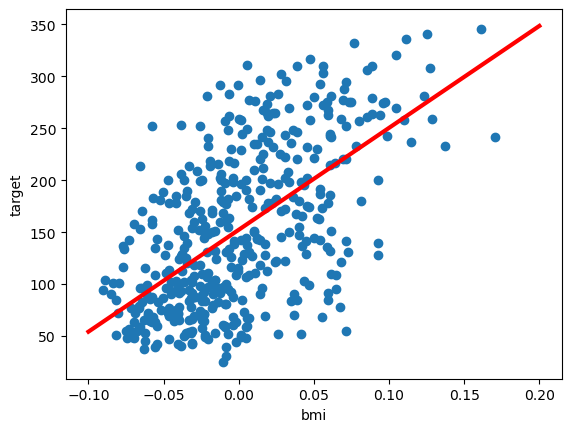

In [37]:
x = np.linspace(-0.1, 0.2, 100)
y = w0 + w1 * x
plt.plot(x, y, c='r', linewidth=3)
plt.scatter(df["bmi"], df["target"])
plt.xlabel("bmi")
plt.ylabel("target")

Выводим таблицу с результатами предсказаний

In [38]:
result = pd.DataFrame({'Actual': y_test, 'Predicted by sklearn': y_pred_sklearn, 'Predicted by my lr': y_pred_my}) 
result

,Actual,Predicted by sklearn,Predicted by my lr
0,321.0,255.174269,255.174269
1,215.0,211.794626,211.794626
2,127.0,161.008702,161.008702
3,64.0,129.267499,129.267499
4,175.0,196.982065,196.982065
...,...,...,...
84,104.0,64.727054,64.727054
85,49.0,82.713736,82.713736
86,103.0,194.865984,194.865984
87,142.0,166.298902,166.298902
